# **AI-Driven Implant detection: Integrating Computer Vision and Radiology**


[![GMAIL](https://img.shields.io/badge/Gmail-D14836?style=for-the-badge&logo=gmail&logoColor=white)](mailto:drbalaganesh.dentist@gmail.com)
[![INSTAGRAM](https://img.shields.io/badge/Instagram-E4405F?style=for-the-badge&logo=instagram&logoColor=white)](https://www.instagram.com/_bala.7601/)
[![LINKDIN](https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/drbalaganeshdentist/)
[![GITHUB](https://img.shields.io/badge/GitHub-100000?style=for-the-badge&logo=github&logoColor=white)](https://github.com/DrDataScience-dentist/AI-Driven-Implant-Risk-Assessment-Integrating-Logistic-Regression-and-Computer-Vision)
---



In [1]:
!nvidia-smi

Thu Jul 31 14:15:51 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P0             26W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


## Install YOLO11 via Ultralytics

In [3]:
%pip install ultralytics supervision roboflow
# prevent ultralytics from tracking your activity
!yolo settings sync=False
import ultralytics
ultralytics.checks()

Ultralytics 8.3.171 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6411.6/8062.4 GB disk)


## Fine-tune YOLO11 on custom dataset

**NOTE:** When training YOLOv11, make sure your data is located in `datasets`. If you'd like to change the default location of the data you want to use for fine-tuning, you can do so through Ultralytics' `settings.json`. In this tutorial, we will use one of the [datasets](https://universe.roboflow.com/liangdianzhong/-qvdww) available on [Roboflow Universe](https://universe.roboflow.com/). When downloading, make sure to select the `yolov11` export format.

In [4]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="4ZQ2GRG22mUeqtXFX26n")
project = rf.workspace("implant-system-identification").project("implant-system-detection")
version = project.version(9)
dataset = version.download("yolov11")
                

/kaggle/working/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to IMPLANT-SYSTEM-DETECTION-9 in yolov11:: 100%|██████████| 9346/9346 [00:01<00:00, 6908.27it/s]


## Custom Training

In [5]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=300 imgsz=800 plots=True 

/kaggle/working
100%|███████████████████████████████████████| 18.4M/18.4M [00:00<00:00, 167MB/s]
Ultralytics 8.3.171 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/datasets/IMPLANT-SYSTEM-DETECTION-9/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=300, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=800, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs

**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`. Let's examine them.

In [6]:
!ls {HOME}/runs/detect/train/

args.yaml			 labels.jpg	       train_batch67862.jpg
BoxF1_curve.png			 results.csv	       val_batch0_labels.jpg
BoxP_curve.png			 results.png	       val_batch0_pred.jpg
BoxPR_curve.png			 train_batch0.jpg      val_batch1_labels.jpg
BoxR_curve.png			 train_batch1.jpg      val_batch1_pred.jpg
confusion_matrix_normalized.png  train_batch2.jpg      val_batch2_labels.jpg
confusion_matrix.png		 train_batch67860.jpg  val_batch2_pred.jpg
labels_correlogram.jpg		 train_batch67861.jpg  weights


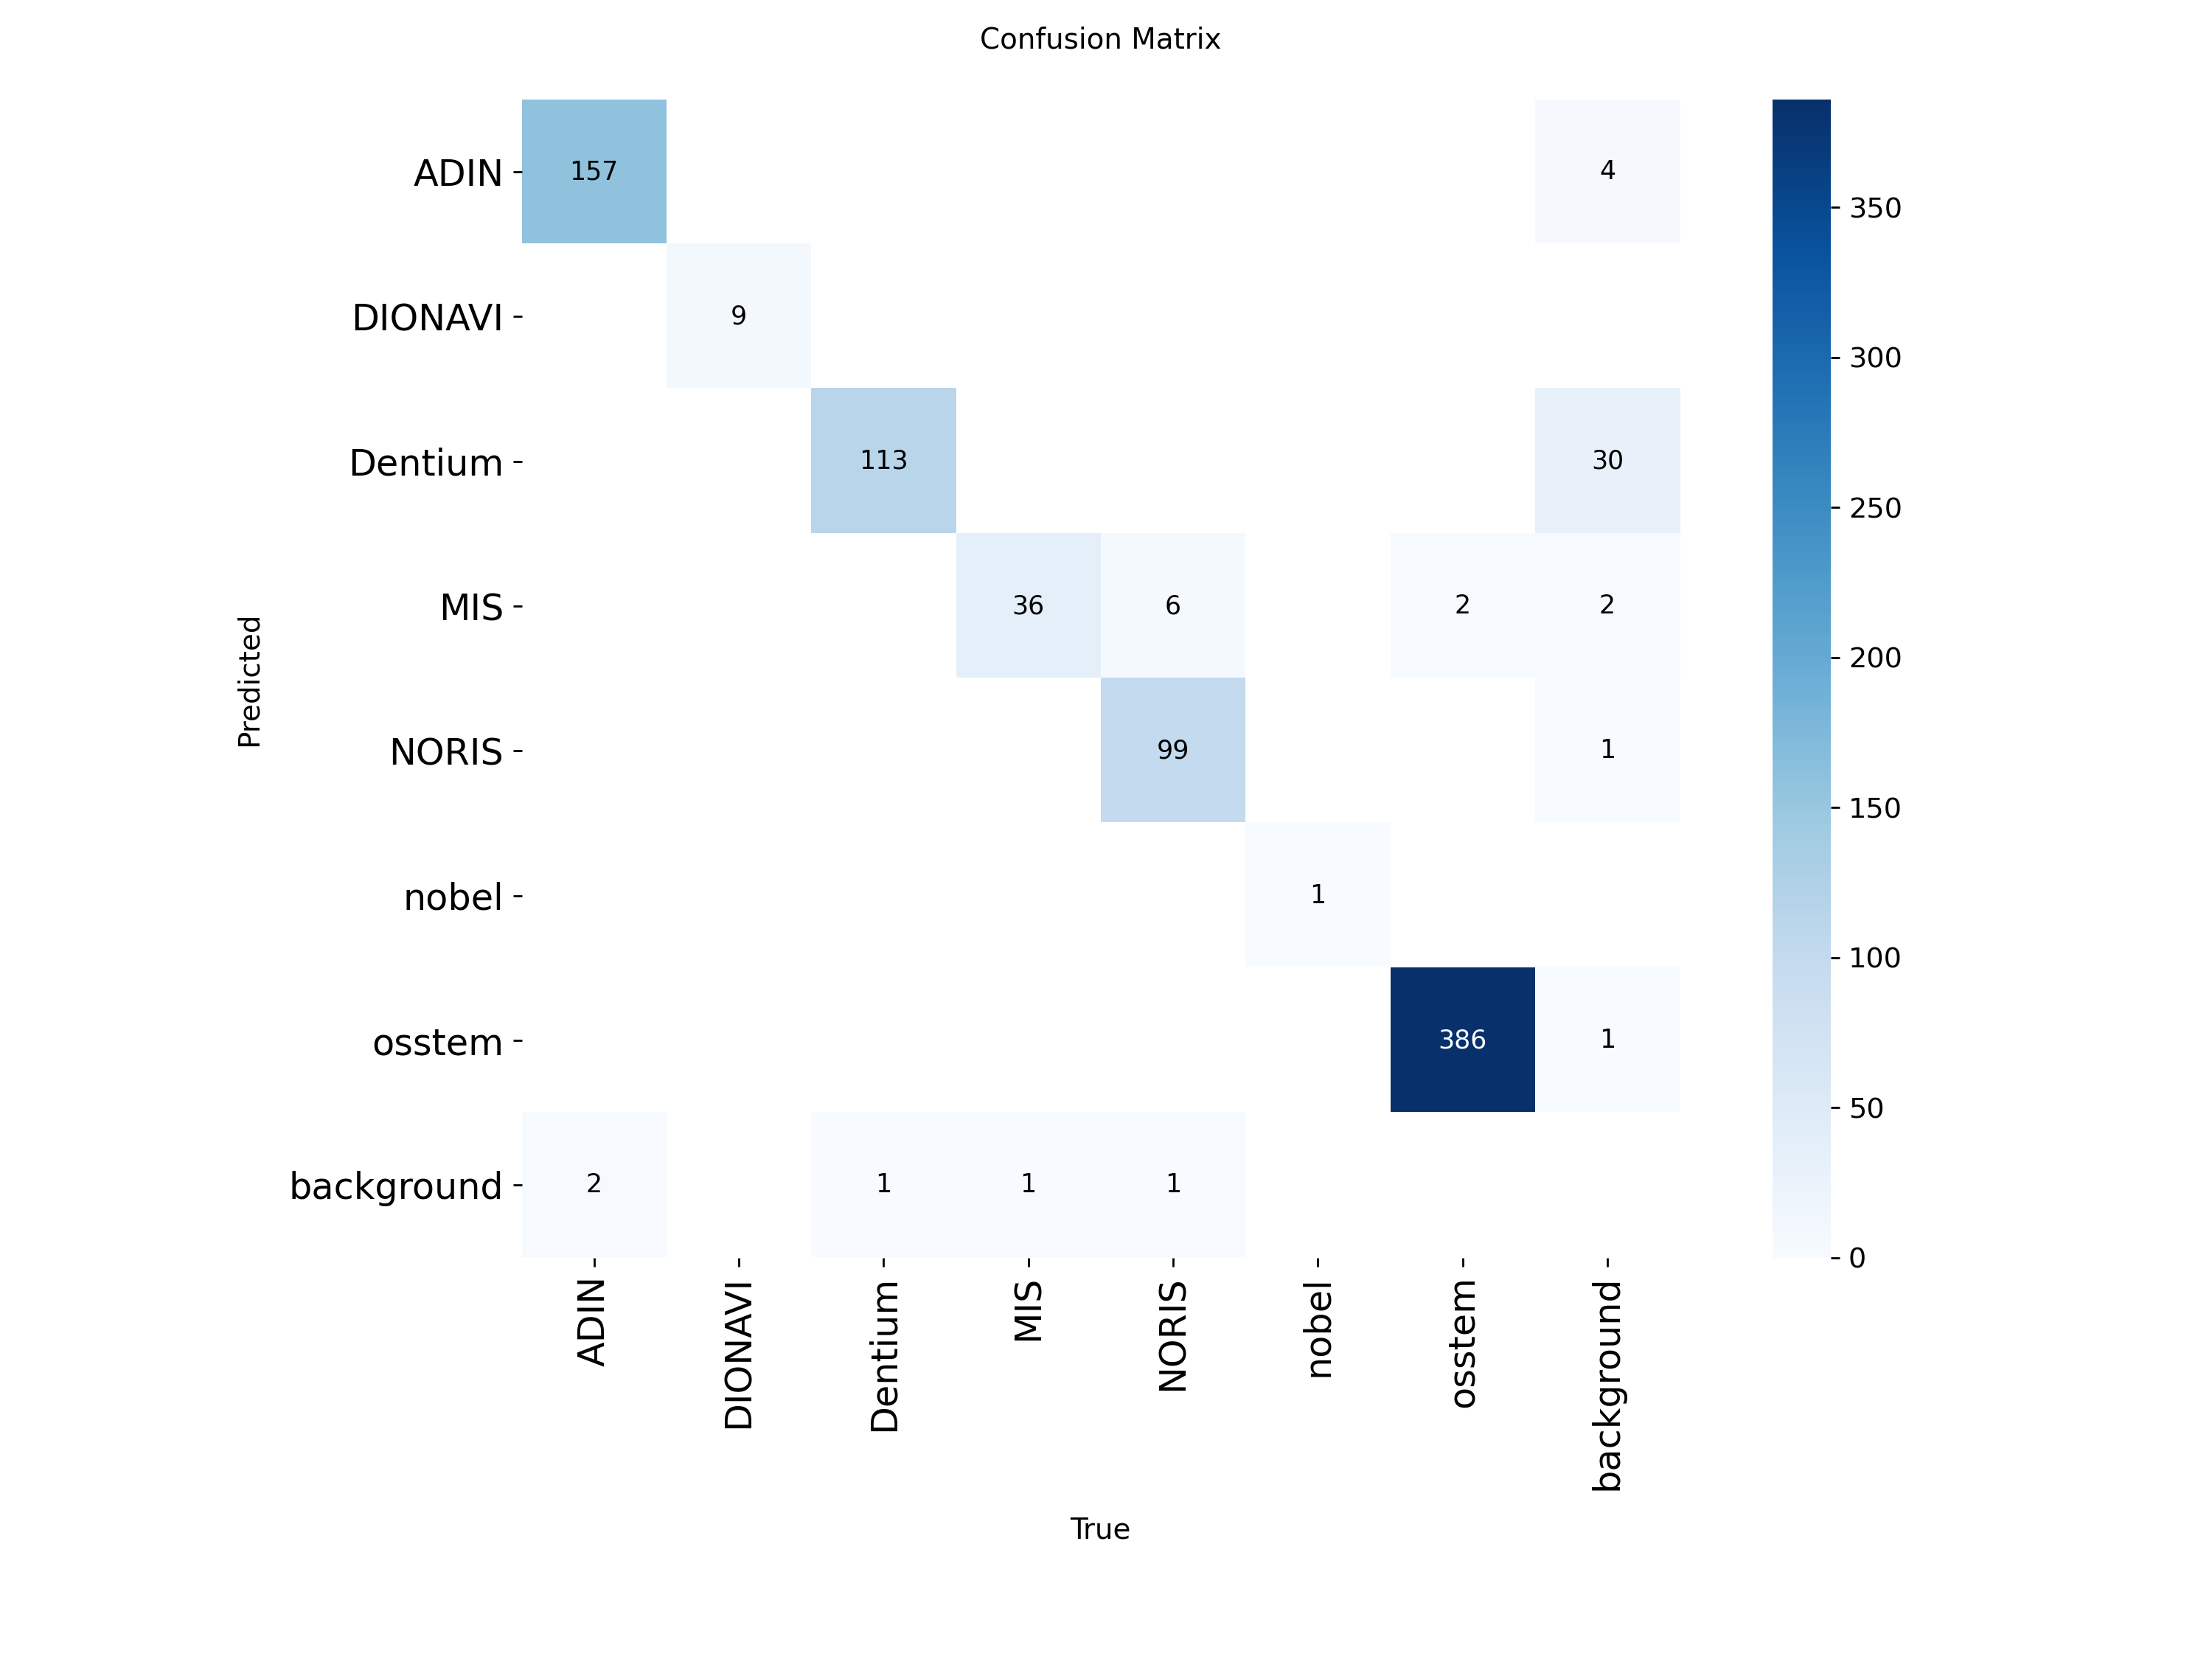

In [7]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

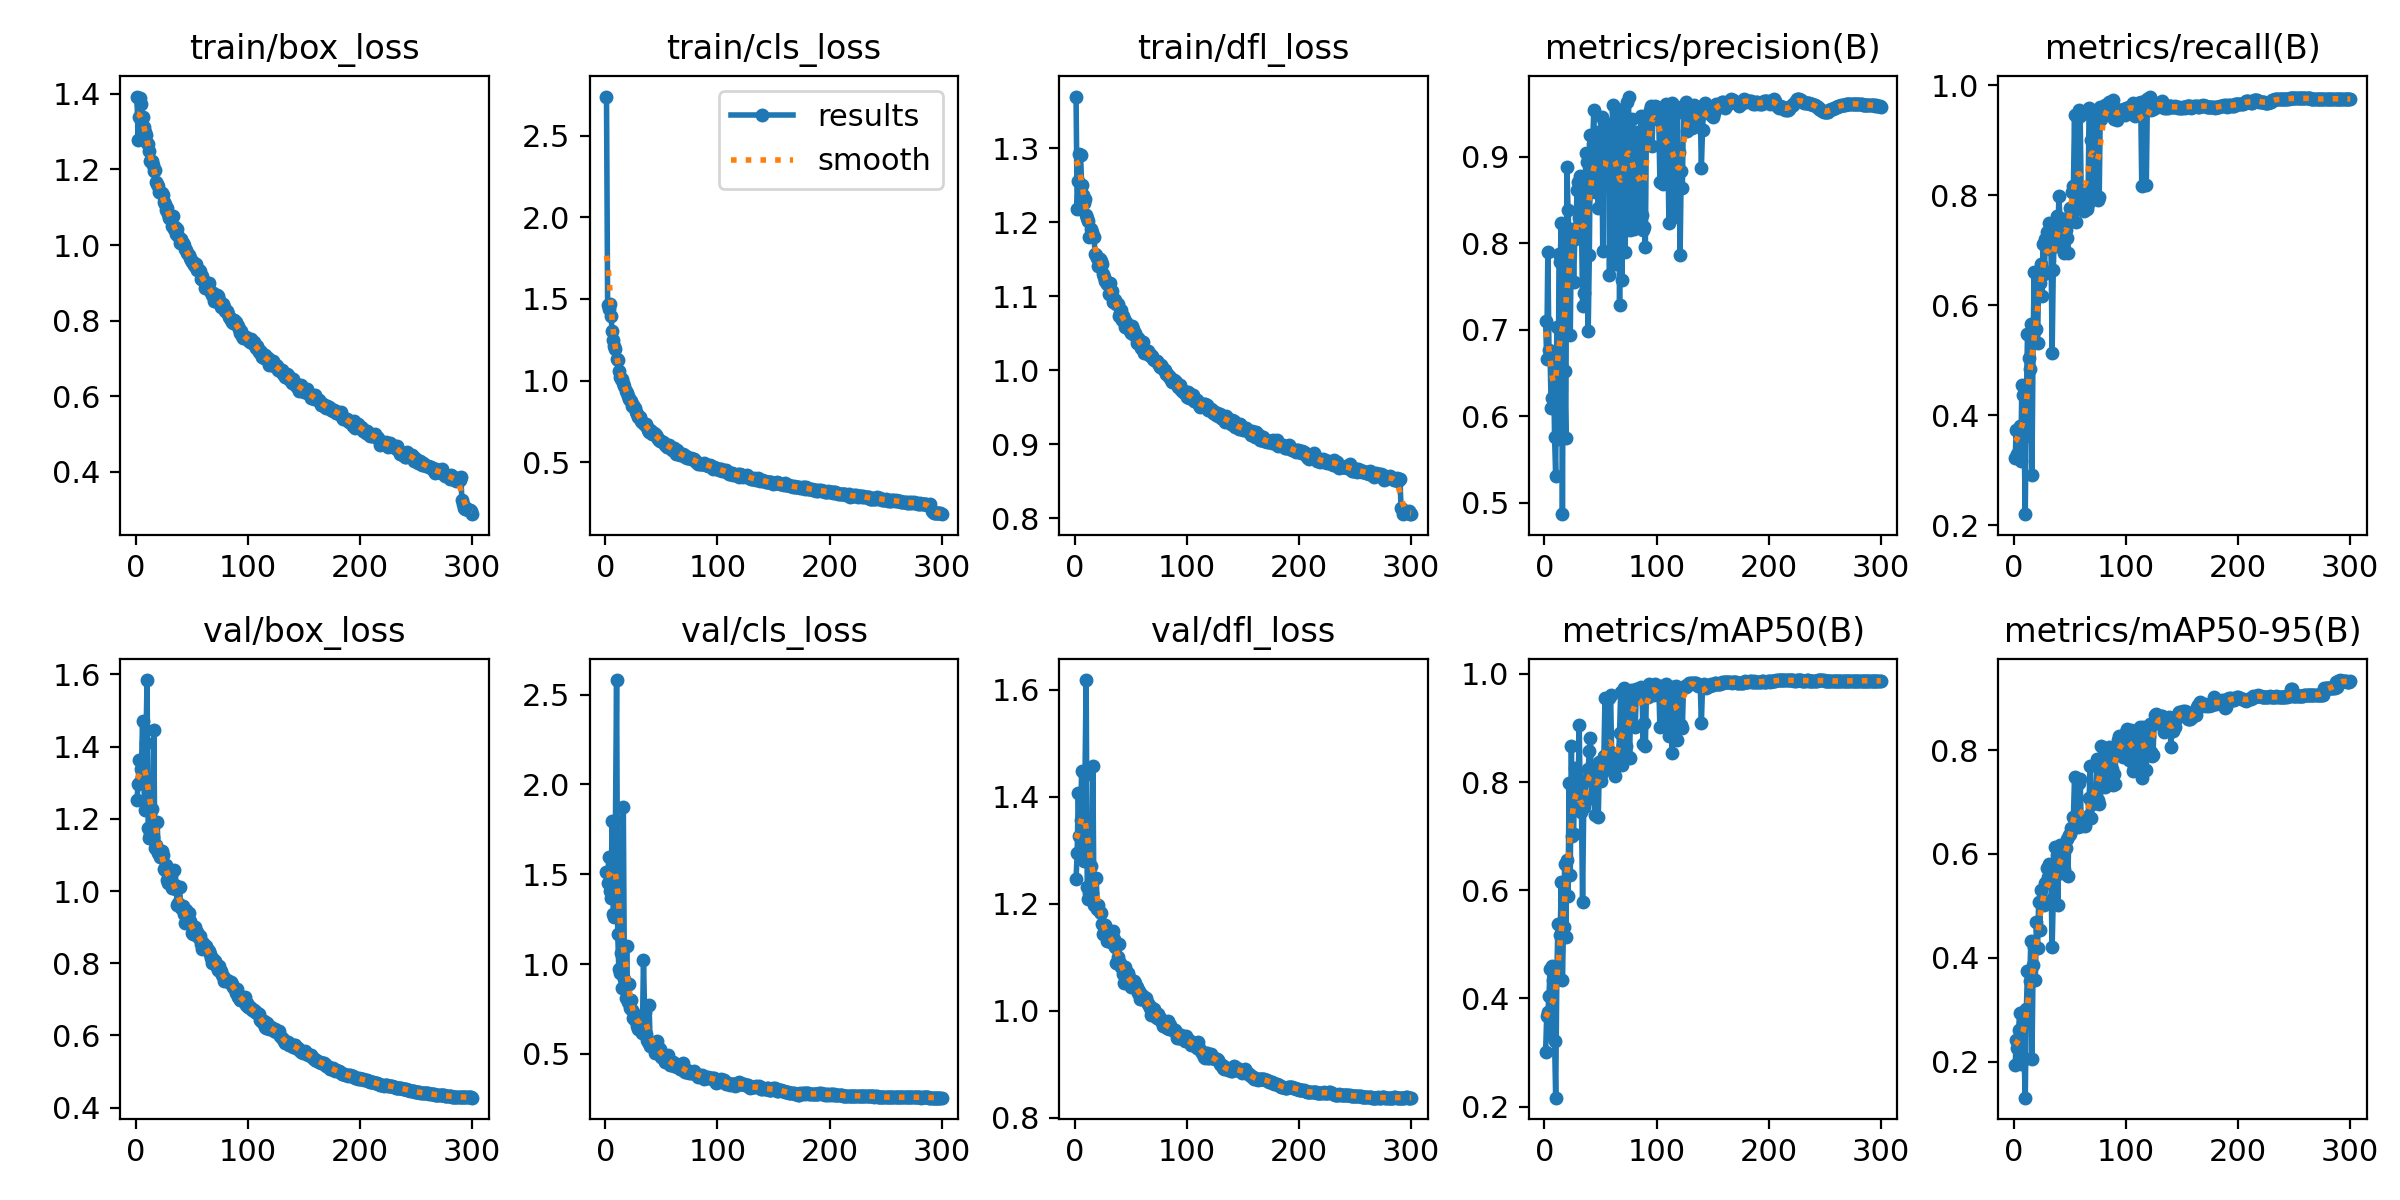

In [8]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

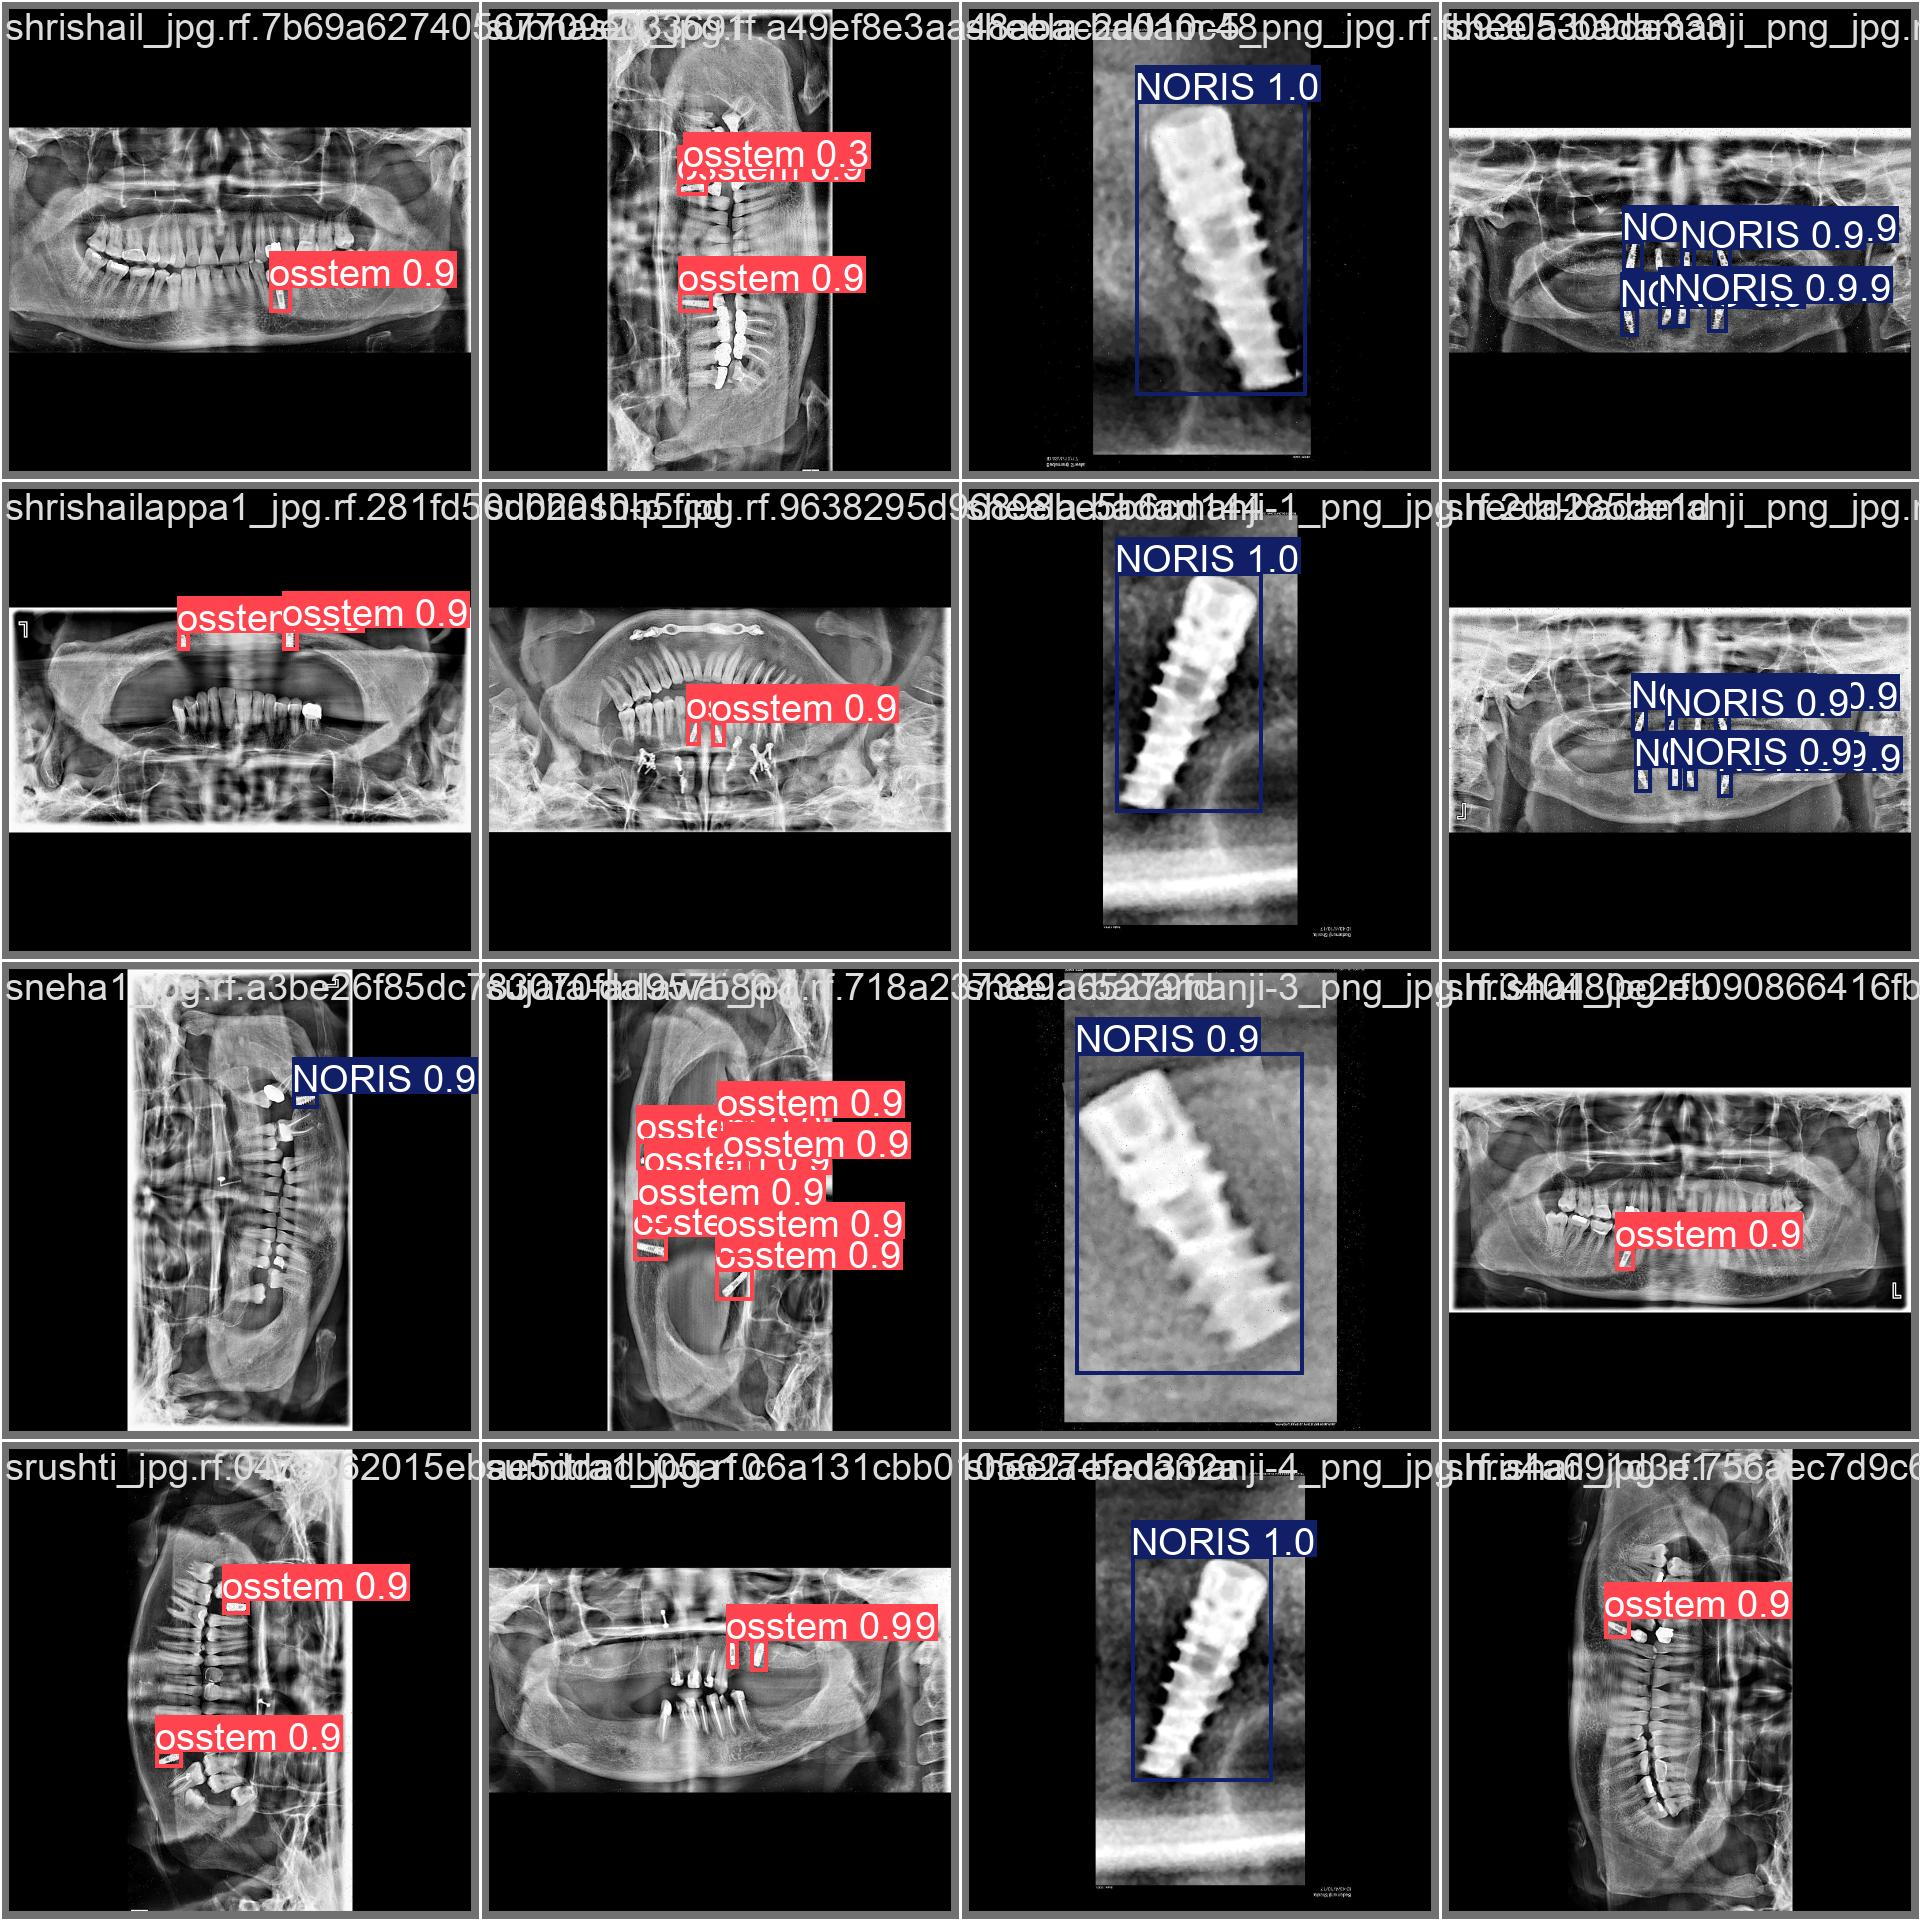

In [9]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate fine-tuned model

In [10]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.171 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11s summary (fused): 100 layers, 9,415,509 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1691.8±546.9 MB/s, size: 86.3 KB)
val: Scanning /kaggle/working/datasets/IMPLANT-SYSTEM-DETECTION-9/valid/labels.c
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4, len(boxes) = 814. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  m
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
                   all        467    

## Inference with custom model

In [11]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.171 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11s summary (fused): 100 layers, 9,415,509 parameters, 0 gradients, 21.3 GFLOPs

image 1/466 /kaggle/working/datasets/IMPLANT-SYSTEM-DETECTION-9/test/images/1-s2-0-S1991790223000521-gr3_jpg.rf.b91cd0ccc644e5d9d9e0d3bf1d1cf496.jpg: 800x800 1 MIS, 11.5ms
image 2/466 /kaggle/working/datasets/IMPLANT-SYSTEM-DETECTION-9/test/images/10_jpg.rf.943ad3608fa3a885f62def8edb32ff8b.jpg: 800x800 1 ADIN, 11.6ms
image 3/466 /kaggle/working/datasets/IMPLANT-SYSTEM-DETECTION-9/test/images/10_jpg.rf.a602867840acca5bc879b899523114d4.jpg: 800x800 1 ADIN, 11.5ms
image 4/466 /kaggle/working/datasets/IMPLANT-SYSTEM-DETECTION-9/test/images/11_jpg.rf.62605f6566779786a0c36448732d9f2b.jpg: 800x800 1 NORIS, 11.5ms
image 5/466 /kaggle/working/datasets/IMPLANT-SYSTEM-DETECTION-9/test/images/12_jpg.rf.567bd9203d51629dc3d35838f99714a8.jpg: 800x800 1 NORIS, 11.5ms
image 6/466 /kaggle/working/datasets/IMPLANT-SYSTEM-DETECT

**NOTE:** Let's take a look at few results.

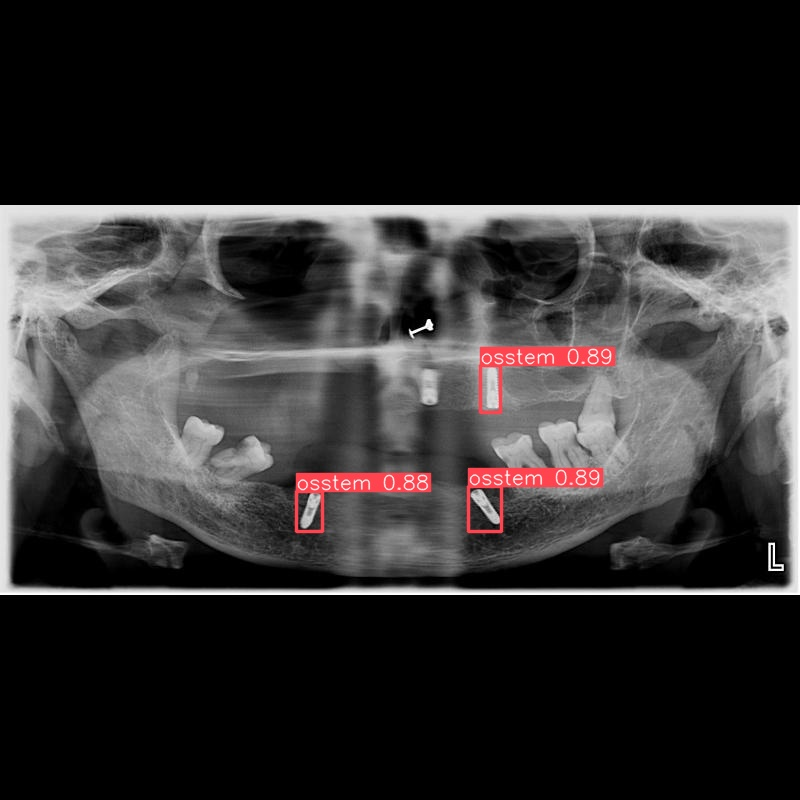

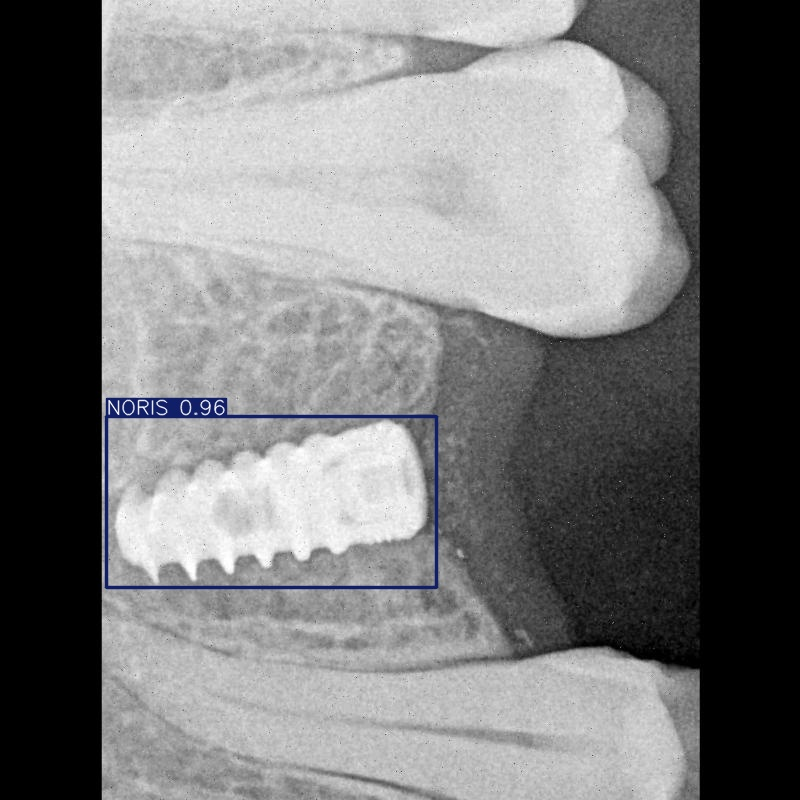

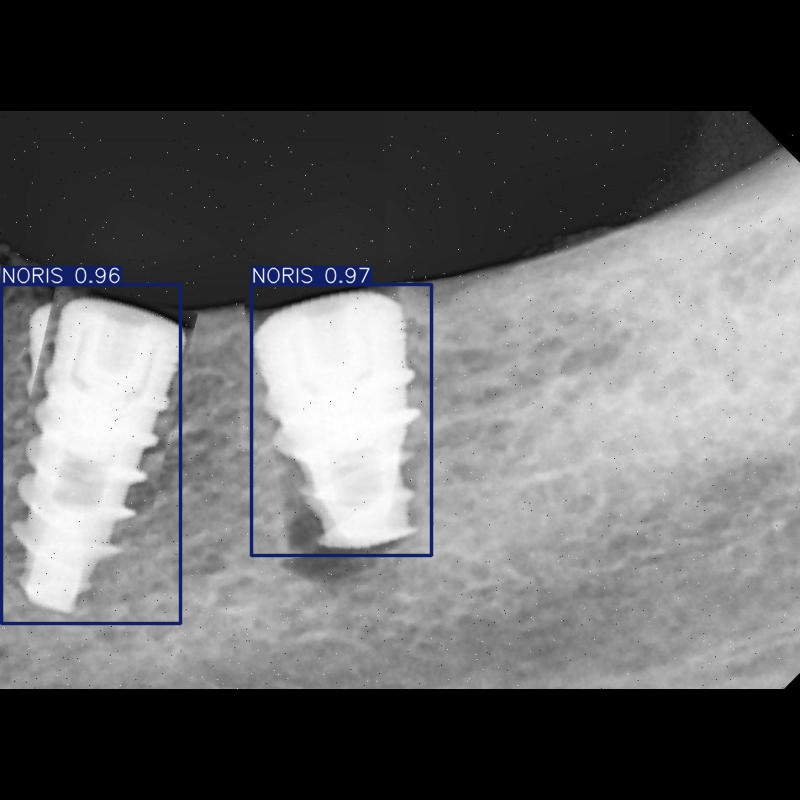

In [12]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")